In [2]:
from mcda.matrices import PerformanceTable
from mcda.scales import QuantitativeScale, PreferenceDirection
from mcda.outranking.electre import Electre3
from mcda.outranking.promethee import Promethee1, Promethee2
import numpy as np
from mcda.functions import VShapeFunction
from mcda.relations import PreferenceStructure
from helper_functions import dict_to_matrix, dict_to_matrix_with_prefix, net_flow_score, net_flow_score_pos_neg, create_preference_matrix, outranking_ranking, resolve_matrix_preferences, visualize_outranking

from new_methods.crisp_partial import crisp_partial
from new_methods.electre_partial import electre_partial
from new_methods.promethee_partial import promethee_partial

from new_methods.crisp_complete import crisp_complete
from new_methods.electre_complete import electre_complete
from new_methods.promethee_complete import promethee_complete
from hassediagram import plot_hasse


In [3]:
labels = ["A1", "A2", "A3", "A4", "A5", "A6", "A7"]

In [4]:
weights = [8, 4, 7, 2, 5]

In [5]:
alternatives = [
    "A1",
    "A2",
    "A3",
    "A4",
    "A5",
    "A6",
    "A7"
]

# Definicja skali dla każdego kryterium
scales = {
    0: QuantitativeScale(1000, 4000, preference_direction=PreferenceDirection.MIN),# Price 
    1: QuantitativeScale(32, 1024, preference_direction=PreferenceDirection.MAX),    # Memory Size
    2: QuantitativeScale(8, 120, preference_direction=PreferenceDirection.MAX),     # Camera 
    3: QuantitativeScale(0, 5, preference_direction=PreferenceDirection.MAX),      # Functionalities 
    4: QuantitativeScale(12, 32, preference_direction=PreferenceDirection.MAX),      # Battery life
}

cutoff = 0.7 # threshold

dataset = PerformanceTable(
    [[2200, 128, 120, 3, 16], [2800, 128, 16, 4, 28], [1200, 256, 120, 4, 12], [3400, 64, 16, 3, 24], [1600, 256, 32, 2, 20], [1000, 64, 32, 4, 26], [3200, 128, 64, 4, 22]],
    alternatives=alternatives, scales=scales
)
# Wagi kryteriów
W = {
    0: weights[0],  # Price 
    1: weights[1],   # Memory Size
    2: weights[2],  # Camera 
    3: weights[3],  # Functionalities 
    4: weights[4]   # Battery life
}

# Parametry Electre III

I = {0: 300, 1: 64,  2: 12, 3: 2,      4: 2}
P = {0: 600, 1: 256, 2: 32, 3: 3,      4: 6}
V = {0: 900, 1: 512, 2: 64, 3: np.inf, 4: 12}

In [6]:
electre3 = Electre3(performance_table=dataset, 
                    criteria_weights=W, 
                    indifference_thresholds=I, 
                    preference_thresholds=P, 
                    veto_thresholds=V)

In [7]:
electre_matrix = electre3.construct().data
electre_binary_matrix = (electre_matrix >= cutoff).astype(int)

# relacje

In [8]:
electre_binary_matrix

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,1,0,0,1
A2,0,1,0,1,0,0,1
A3,1,0,1,0,1,0,1
A4,0,0,0,1,0,0,1
A5,0,1,0,1,1,0,1
A6,0,1,0,1,1,1,1
A7,0,1,0,1,0,0,1


# partial

In [9]:
new_crisp_partial = crisp_partial(electre_binary_matrix.values)

Restricted license - for non-production use only - expires 2026-11-23


c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\crisp_partial.py:51: DeprecationWarning: Model.display() is deprecated
  m.display()


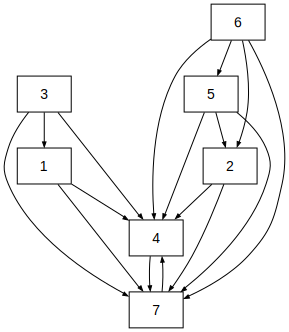

In [10]:
visualize_outranking(dict_to_matrix(new_crisp_partial['solution_r']).astype(int))

In [11]:
new_crisp_partial['objective_value']

8.0

In [12]:
dict_to_matrix(new_crisp_partial['solution_R']).astype(int)

array([[1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [13]:
dict_to_matrix_with_prefix(new_crisp_partial['solution_P_minus']).astype(int)

array([[1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 1]])

In [14]:
dict_to_matrix_with_prefix(new_crisp_partial['solution_P_plus']).astype(int)

array([[1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1]])

In [15]:
dict_to_matrix(new_crisp_partial['solution_I']).astype(int)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1]])

In [16]:
dict_to_matrix(new_crisp_partial['solution_r']).astype(int)

array([[1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1]])

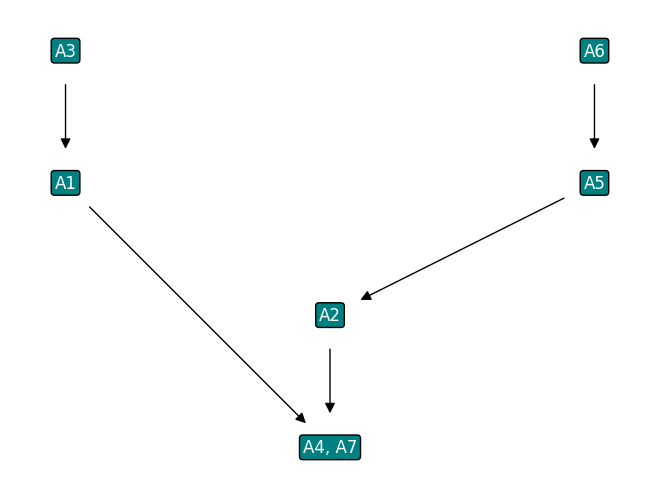

In [17]:
plot_hasse(dict_to_matrix(new_crisp_partial['solution_r']).astype(int), labels)

# complete

In [18]:
new_crisp_complete = crisp_complete(electre_binary_matrix.values)

c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\crisp_complete.py:40: DeprecationWarning: Model.display() is deprecated
  m.display()


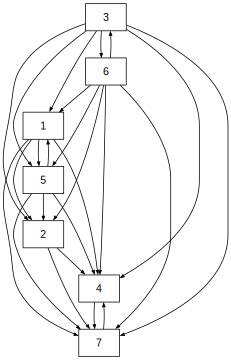

In [19]:
visualize_outranking(dict_to_matrix(new_crisp_complete['solution_r']).astype(int))

In [20]:
new_crisp_complete['objective_value']

18.0

In [21]:
dict_to_matrix(new_crisp_complete['solution_z']).astype(int)

array([[1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1]])

In [22]:
dict_to_matrix(new_crisp_complete['solution_r']).astype(int)

array([[1, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1]])

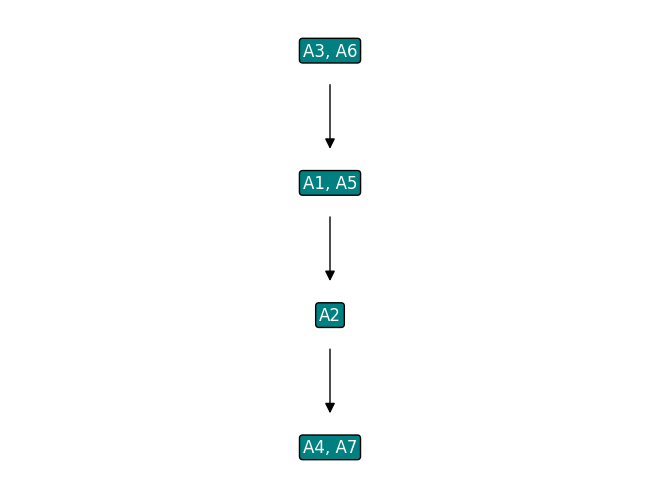

In [23]:
plot_hasse(dict_to_matrix(new_crisp_complete['solution_r']).astype(int), labels)

# zestawienie

In [24]:
electre_binary_matrix.values

array([[1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1]])

# partial

In [25]:
import pandas as pd

In [26]:
p_plus = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix_with_prefix(new_crisp_partial['solution_P_plus']).astype(int)));p_plus

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,1,0,0,1
A2,0,1,0,1,0,0,1
A3,1,0,1,0,0,0,1
A4,0,0,0,1,0,0,0
A5,0,1,0,1,1,0,1
A6,0,1,0,1,1,1,1
A7,0,0,0,0,0,0,1


In [27]:
#P-
p_minus = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix_with_prefix(new_crisp_partial['solution_P_minus']).astype(int)));p_minus

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,0,0,0,0
A2,0,1,0,0,0,0,0
A3,0,0,1,0,0,0,0
A4,0,0,0,1,0,0,0
A5,0,0,0,0,1,0,0
A6,0,0,0,0,0,1,0
A7,0,1,0,0,0,0,1


In [28]:
#I
indiff = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix(new_crisp_partial['solution_I']).astype(int)));indiff

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,0,0,0,0
A2,0,1,0,0,0,0,0
A3,0,0,1,0,0,0,0
A4,0,0,0,1,0,0,1
A5,0,0,0,0,1,0,0
A6,0,0,0,0,0,1,0
A7,0,0,0,1,0,0,1


In [29]:
#R
incomp = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix(new_crisp_partial['solution_R']).astype(int)));incomp

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,0,0,0,0
A2,0,1,0,0,0,0,0
A3,0,0,1,0,1,0,0
A4,0,0,0,1,0,0,0
A5,0,0,0,0,1,0,0
A6,0,0,0,0,0,1,0
A7,0,0,0,0,0,0,1


In [30]:
def calculate_objective_cost(matrix_a: np.ndarray, matrix_b: np.ndarray, return_changes=False):
    # Sprawdzenie zgodności wymiarów
    if matrix_a.shape != matrix_b.shape:
        raise ValueError("Macierze muszą mieć takie same wymiary.")

    # Klasyfikacja relacji
    def classify_relation(a, b):
        if a == 1 and b == 0:
            return 'P+'
        elif a == 0 and b == 1:
            return 'P-'
        elif a == 1 and b == 1:
            return 'I'
        elif a == 0 and b == 0:
            return 'R'
    
    # Macierz kosztów
    cost_matrix = {
        ('P+', 'P+'): 0, ('P+', 'P-'): 4, ('P+', 'I'): 2, ('P+', 'R'): 3,
        ('P-', 'P+'): 4, ('P-', 'P-'): 0, ('P-', 'I'): 2, ('P-', 'R'): 3,
        ('I',  'P+'): 2, ('I',  'P-'): 2, ('I',  'I'): 0, ('I',  'R'): 2,
        ('R',  'P+'): 3, ('R',  'P-'): 3, ('R',  'I'): 2, ('R',  'R'): 0,
    }

    total_cost = 0
    changes = []

    for i in range(matrix_a.shape[0]):
        for j in range(i, matrix_a.shape[1]):
            if i != j:
                rel_a = classify_relation(matrix_a[i, j], matrix_a[j, i])
                rel_b = classify_relation(matrix_b[i, j], matrix_b[j, i])
                cost = cost_matrix[(rel_a, rel_b)]
                if rel_a != rel_b:
                    changes.append(((i, j), rel_a, rel_b, cost))
                total_cost += cost

    if return_changes:
        return total_cost, changes
    return total_cost

In [31]:
electre_binary_matrix.values

array([[1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1]])

In [32]:
dict_to_matrix(new_crisp_partial['solution_r'])

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1.]])

In [33]:
electre_binary_matrix.values - dict_to_matrix(new_crisp_partial['solution_r'])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [34]:
calculate_objective_cost(dict_to_matrix(new_crisp_partial['solution_r']), electre_binary_matrix.values, True)

(8, [((1, 6), 'P+', 'I', 2), ((2, 3), 'P+', 'R', 3), ((2, 4), 'R', 'P+', 3)])

# complete 

In [35]:
pref = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix(new_crisp_complete['solution_r']).astype(int)));pref

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,1,0,0,1
A2,0,1,0,1,0,0,1
A3,1,0,1,0,1,0,1
A4,0,0,0,1,0,0,1
A5,0,1,0,1,1,0,1
A6,0,1,0,1,1,1,1
A7,0,0,0,1,0,0,1


In [36]:
indiff = pd.DataFrame(np.multiply(electre_binary_matrix, dict_to_matrix(new_crisp_complete['solution_z']).astype(int)));indiff

,A1,A2,A3,A4,A5,A6,A7
A1,1,0,0,0,0,0,0
A2,0,1,0,0,0,0,0
A3,0,0,1,0,0,0,0
A4,0,0,0,1,0,0,1
A5,0,0,0,0,1,0,0
A6,0,0,0,0,0,1,0
A7,0,0,0,1,0,0,1


In [37]:
electre_binary_matrix.values - dict_to_matrix(new_crisp_complete['solution_r'])

array([[ 0., -1.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [38]:
calculate_objective_cost(dict_to_matrix(new_crisp_complete['solution_r']), electre_binary_matrix.values, True)

(18,
 [((0, 1), 'P+', 'R', 3),
  ((0, 4), 'I', 'R', 2),
  ((0, 5), 'P-', 'R', 3),
  ((1, 2), 'P-', 'R', 3),
  ((1, 6), 'P+', 'I', 2),
  ((2, 3), 'P+', 'R', 3),
  ((2, 5), 'I', 'R', 2)])